In [7]:
import numpy as np
import matplotlib.pyplot as plt

class StochasticInterestRateModel:
    def __init__(self, mu, sigma, initial_rate):
        """
        Initializes the stochastic interest rate model.

        Parameters:
        mu (float): Mean interest rate.
        sigma (float): Standard deviation of interest rate.
        initial_rate (float): Initial interest rate.
        """
        self.mu = mu
        self.sigma = sigma
        self.initial_rate = initial_rate
    
    def milstein_scheme(self, simulations_number, steps_number, time_period):
        """
        Simulates interest rate paths using the Milstein scheme.

        Parameters:
        simulations_number (int): Number of simulations.
        steps_number (int): Number of time steps.
        time_period (float): Time period.

        Returns:
        numpy.ndarray: Array containing interest rate paths for each simulation.
        """
        dt = time_period / steps_number
        X = np.zeros((simulations_number, steps_number + 1))
        X[:, 0] = self.initial_rate
        
        for i in range(steps_number):
            dW = np.random.normal(0, np.sqrt(dt), size=simulations_number)
            dW2 = dW**2 - dt
            X[:, i + 1] = (1 + self.mu * dt + self.sigma * np.sqrt(dt) * dW + 0.5 * self.sigma**2 * dW2) * X[:, i]
        
        return X
    
    def plot_paths(self, X, time_period):
        """
        Plots interest rate paths.

        Parameters:
        X (numpy.ndarray): Array containing interest rate paths for each simulation.
        time_period (float): Time period.
        """
        simulations_number = X.shape[0]
        steps_number = X.shape[1] - 1
        time_grid = np.linspace(0, time_period, steps_number + 1)
        
        plt.figure(figsize=(12, 6))
        for i in range(simulations_number):
            plt.plot(time_grid, X[i, :], lw=0.8)
        plt.title('Simulated Interest Rate Paths')
        plt.xlabel('Time')
        plt.ylabel('Interest Rate')
        plt.grid(True)
        plt.show()
    
    def calibrate_to_data(self, historical_data):
        """
        Calibrates model parameters based on historical data.

        Parameters:
        historical_data (numpy.ndarray or list): Historical interest rate data.
        """
        log_returns = np.diff(np.log(historical_data))
        self.mu = np.mean(log_returns)
        self.sigma = np.std(log_returns)
        print(f'Calibrated mu: {self.mu:.6f}, Calibrated sigma: {self.sigma:.6f}')


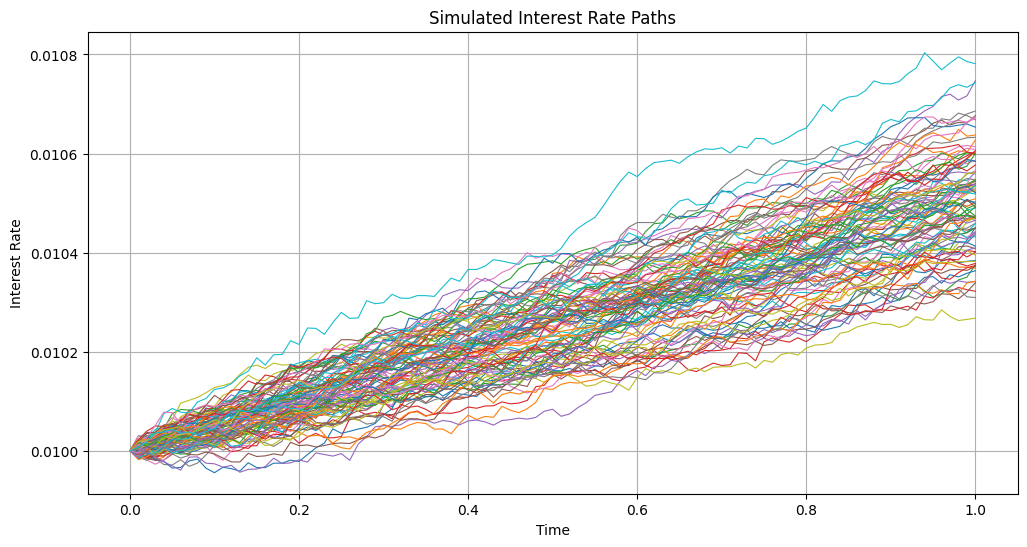

Calibrated mu: 0.505986, Calibrated sigma: 0.676242


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load historical data from csv file
def load_historical_data_from_csv(file_path):
    """
    Load historical interest rate data from a CSV file.

    Parameters:
    file_path (str): Path to the CSV file.

    Returns:
    numpy.ndarray: Array containing historical interest rate data.
    """
    data=np.genfromtxt(file_path, delimiter=',', skip_header=1) 
    return data[:, 1]  # Remove the first column


# Initialize the model
mu = 0.05  # drift parameter
sigma = 0.1  # volatility parameter
initial_rate = 0.01  # initial interest rate

model = StochasticInterestRateModel(mu, sigma, initial_rate)

# Parameters for simulation
simulations_number = 100  # number of Monte Carlo simulations
steps_number = 100  # number of time steps
time_period = 1.0  # total time period

# Perform Milstein simulation
simulated_rates = model.milstein_scheme(simulations_number, steps_number, time_period)

# Plot simulated interest rate paths
model.plot_paths(simulated_rates, time_period)

# Example historical data for calibration
historical_data = np.array([0.01 , 0.02 , 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.95])

# Calibrate model to historical data
model.calibrate_to_data(historical_data)


In [9]:
# Load example historical data from csv
file_path = 'zcbs.csv'
historical_data = load_historical_data_from_csv(file_path)

# Calibrate model to historical data
model.calibrate_to_data(historical_data)

Calibrated mu: 0.000005, Calibrated sigma: 0.000088
